In [4]:
from HS_reading.classification import classification
from HS_reading.lag_brain_plot import plot_HS,elec_sig
from HS_reading.lag_process import lag_plot
from HS_reading.plot_arrows import  arrow_plot

import scipy.io as scio
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import os
import argparse
import networkx as nx
from collections import defaultdict
import matplotlib.image as mpimg

# %matplotlib qt


In [5]:
HS_list = [44, 45, 47, 48, 50,54, 71,73,76,78]
clear_path="/Users/zhaozehao/Desktop/reading task/"
test = classification(HS_list,clear_path)
print(test)

{'44': {'postcentral': [0, 1, 2, 3, 4, 5, 6, 7, 16, 17, 18, 19, 20, 21, 22, 32, 33, 34, 35, 49, 50, 71, 72, 73, 74, 75, 76, 86, 87, 88, 89, 90, 91, 92, 102, 103, 104, 105, 106, 107, 119, 120], 'precentral': [8, 9, 10, 11, 23, 24, 25, 36, 37, 38, 39, 40, 51, 52, 53, 54, 55, 56, 77, 78, 79, 95, 108, 121, 122, 123], 'middlefrontal': [12, 13, 14, 15, 26, 27, 28, 29, 30, 31, 41, 42, 43, 44, 45, 46, 47, 57, 58, 59, 60, 61, 62, 63, 93, 94, 109, 110, 111, 124, 125, 126, 127], 'superiortemporal': [48, 112], 'supramarginal': [64, 65, 66, 67, 68, 69, 70, 80, 81, 82, 83, 84, 85, 96, 97, 98, 99, 100, 101, 113, 114, 115, 116, 117, 118]}, '45': {'supramarginal': [0, 1, 2, 3, 4, 5, 16, 17, 18, 19, 20, 21, 34, 64, 65, 66, 67, 68, 69, 70, 80, 81, 82, 83, 84, 85, 86, 87, 96, 97, 98, 99, 100, 101, 102, 103, 112, 113, 114, 115, 116, 117, 118], 'postcentral': [6, 7, 8, 9, 10, 11, 22, 23, 24, 25, 32, 33, 35, 36, 37, 38, 39, 40, 48, 49, 50, 51, 52, 53, 71, 72, 73, 74, 75, 76, 77, 78, 79, 88, 89, 90, 91, 92, 9

In [6]:
HS_list = [44, 45, 47, 48, 50, 54, 71, 73, 76, 78]

# 初始化一个空列表，用于存放所有的keys
all_keys = []

# 遍历HS_list
for HS in HS_list:
    # 获取对应的test[str(HS)]字典的keys，并加入all_keys列表中
    all_keys.extend(test[str(HS)].keys())

# 使用set去除重复值，再转换回列表
unique_keys = list(set(all_keys))

# 输出结果
print(unique_keys)

['supramarginal', 'parstriangularis', 'lateraloccipital', 'postcentral', 'parsopercularis', 'precentral', 'middlefrontal', 'superiorparietal', 'superiortemporal', 'superiorfrontal', 'inferiortemporal', 'inferiorparietal', 'middletemporal', 'parsorbitalis']


In [7]:
test["76"].keys()

dict_keys(['middlefrontal', 'precentral', 'postcentral', 'supramarginal', 'superiortemporal', 'middletemporal'])

In [19]:
color_set = {'superiorfrontal': 'grey', 
         'superiortemporal':'purple', 
         'inferiorparietal':'skyblue', 
         'rostralmiddlefrontal':'black', 
         'parstriangularis':'darkgreen', 
         'superiorparietal':'orange', 
         'postcentral':'blue', 
         'parsopercularis':'gold', 
         'middletemporal':'greenyellow', 
         'inferiortemporal':'pink', 
         'parsorbitalis':'olive', 
         'supramarginal':'green', 
         'lateraloccipital':'navy', 
         'bankssts':'rosybrown', 
         'precentral':'red', 
         'caudalmiddlefrontal':'slategrey',
             'middlefrontal':'black' 
            }

print(test.keys())

dict_keys(['44', '45', '47', '48', '50', '54', '71', '73', '76', '78'])


In [20]:
color_set['supramarginal']

'green'

In [21]:
def plot_warp_brain(HS_list,clean_data_path,warped=True):
    plt.figure(figsize=(15,15))
    path = clean_data_path + "elecs/"
    img = mpimg.imread(path +"MNI.png")
    plt.imshow(img)
    for HS in HS_list:
        subject = 'HS'+str(HS)
        print(subject)
        if warped:
            eleclabel = scio.loadmat(clean_data_path + "/elecs/warped/HS" + str(HS) + "_elecs_all_warped.mat")["anatomy"]
            xy = scio.loadmat(path+"/warped/" + subject + "_warped_elec_pos2D.mat")['elecmatrix']
        
        temp = test[str(HS)]
        for key in list(temp.keys()):
            for elec in temp[key]:
#                 elec_corrected = int(eleclabel[elec][0][0][1:])-1
                elec_corrected = elec
                plt.plot(xy[elec_corrected,0],xy[elec_corrected,1],marker = 'o',markersize =5,color=color_set[key])
        plt.box(on=None)
        plt.yticks([])
        plt.xticks([])

def plot_orig_brain(HS,clean_data_path):
#     plt.figure(figsize=(15,15))
    plt.figure()

    path = clean_data_path + "elecs/brain2D/"
    img = mpimg.imread(path +"HS"+str(HS)+"_brain2D.png")
    plt.imshow(img)

    subject = 'HS'+str(HS)
    print(subject)

    eleclabel = scio.loadmat(clean_data_path + "/elecs/warped/HS" + str(HS) + "_elecs_all_warped.mat")["anatomy"]
    xy = scio.loadmat(path + subject + "_elec_pos2D.mat")['elecmatrix']

    temp = test[str(HS)]
    for key in list(temp.keys()):
        for i in temp[key]:
            plt.plot(xy[i,0],xy[i,1],marker = 'o',markersize =5,color=color_set[key])
    plt.box(on=None)
    plt.yticks([])
    plt.xticks([])

HS44
HS45
HS47
HS48
HS50
HS54
HS71
HS73
HS76
HS78


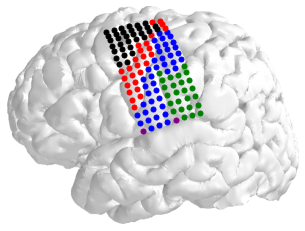

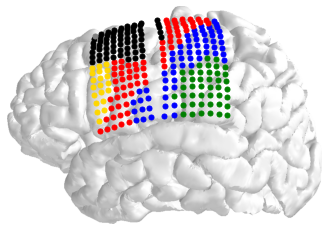

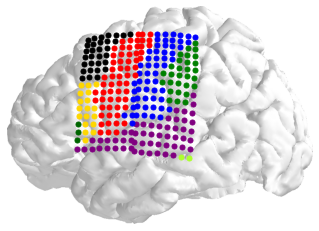

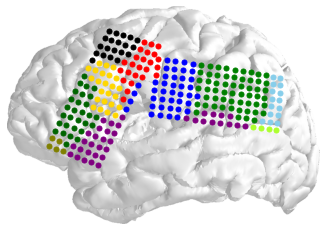

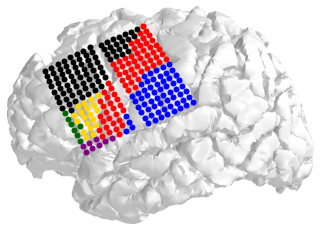

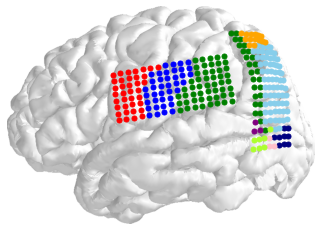

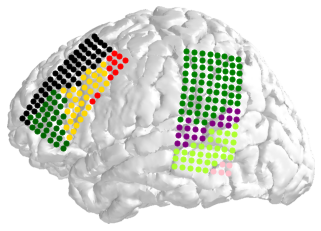

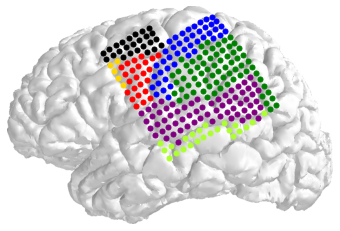

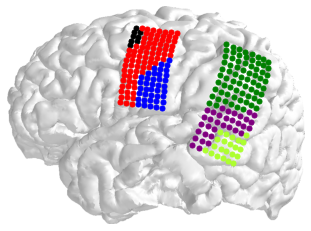

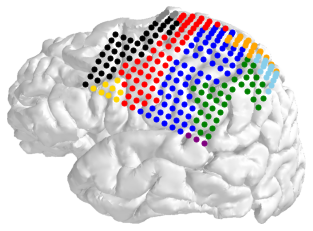

In [22]:
HS_list = [44,45,47,48,50,54,71,73,76,78]
clean_data_path="/Users/zhaozehao/Desktop/reading task/"
for HS in HS_list:
    plot_orig_brain(HS,clean_data_path)


HS44
HS45
HS47
HS48
HS50
HS54
HS71
HS73
HS76
HS78


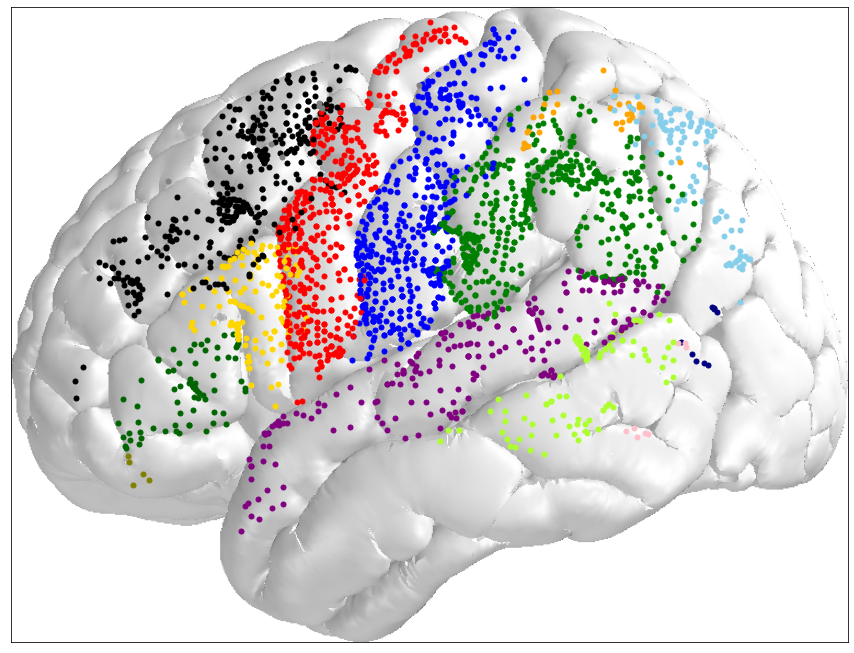

In [23]:
plot_warp_brain([44,45,47,48,50,54,71,73,76,78],clear_path)

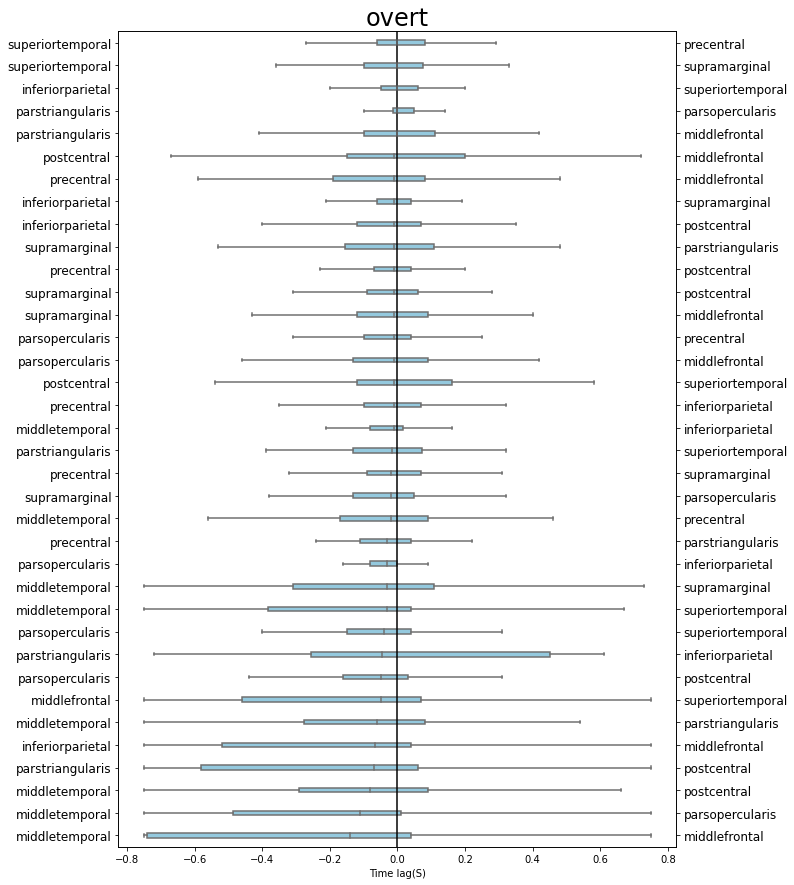

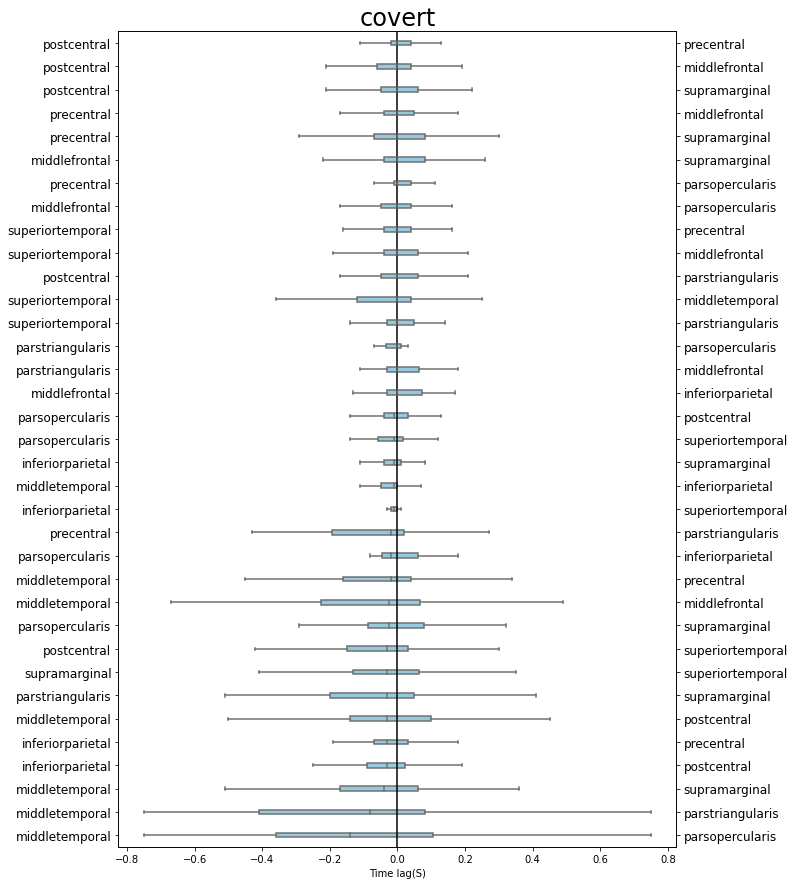

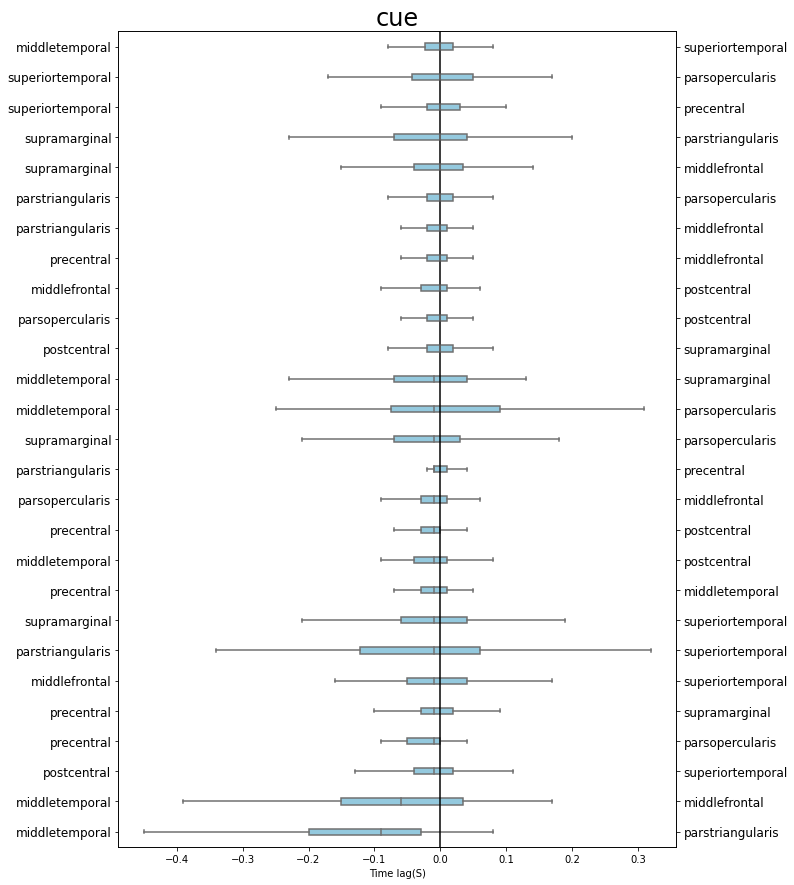

In [24]:
#lag_brain_plot
HS_list1 = [44, 45, 47, 48, 50,54, 71,73,76,78]
width1=0.2

path = "/Users/zhaozehao/Desktop/reading task/lags"
loc_path = "/Users/zhaozehao/Desktop/reading task/"
mat_path='/Users/zhaozehao/Desktop/reading task/elecs/elec_sig'
remove_list = ['lateraloccipital', 'inferiortemporal','bankssts','superiorfrontal', 
               'parsorbitalis','rostralmiddlefrontal','superiorparietal']
node_to_remove={'overt':remove_list,'covert':remove_list,'cue':remove_list}

time_lag,r = plot_HS(HS_list1,path,loc_path,mat_path,width1,'plot',node_to_remove)
# print(plot_HS(HS_list1,path,loc_path,mat_path,width1,'print'))

In [25]:
time_lag

{'overt': {'postcentral_precentral': 0.01,
  'postcentral_middlefrontal': -0.01,
  'postcentral_supramarginal': 0.01,
  'precentral_middlefrontal': -0.01,
  'precentral_supramarginal': -0.02,
  'middlefrontal_supramarginal': 0.01,
  'supramarginal_parsopercularis': -0.02,
  'postcentral_parsopercularis': 0.05,
  'precentral_parsopercularis': 0.01,
  'middlefrontal_parsopercularis': 0.01,
  'superiortemporal_postcentral': 0.01,
  'superiortemporal_precentral': 0.0,
  'superiortemporal_middlefrontal': 0.05,
  'superiortemporal_parsopercularis': 0.04,
  'superiortemporal_supramarginal': 0.0,
  'inferiorparietal_supramarginal': -0.01,
  'inferiorparietal_postcentral': -0.01,
  'inferiorparietal_precentral': 0.01,
  'inferiorparietal_superiortemporal': 0.0,
  'inferiorparietal_middletemporal': 0.01,
  'inferiorparietal_parstriangularis': 0.045,
  'inferiorparietal_parsopercularis': 0.03,
  'inferiorparietal_middlefrontal': -0.065,
  'supramarginal_middletemporal': 0.03,
  'supramarginal_par

In [26]:
r

{'overt': {'postcentral_precentral': 0.18915352632215426,
  'postcentral_middlefrontal': 0.11889121994173112,
  'postcentral_supramarginal': 0.1545553211602109,
  'precentral_middlefrontal': 0.12526485716511473,
  'precentral_supramarginal': 0.1568645805766599,
  'middlefrontal_supramarginal': 0.13232987129059917,
  'supramarginal_parsopercularis': 0.17732948021482337,
  'postcentral_parsopercularis': 0.1852495334881855,
  'precentral_parsopercularis': 0.20569496995389216,
  'middlefrontal_parsopercularis': 0.13864364482433056,
  'superiortemporal_postcentral': 0.13864953857685997,
  'superiortemporal_precentral': 0.16655391134216996,
  'superiortemporal_middlefrontal': 0.10399491290726896,
  'superiortemporal_parsopercularis': 0.14942281836296,
  'superiortemporal_supramarginal': 0.15304807228303235,
  'inferiorparietal_supramarginal': 0.14410877979167558,
  'inferiorparietal_postcentral': 0.11799324028144768,
  'inferiorparietal_precentral': 0.14600164046771302,
  'inferiorparietal_s

In [27]:
# HS_list = [44, 45, 47, 48, 50, 54, 71, 73, 76,78]
# # HS_list = [44]


# clean_data_path = "/Users/zhaozehao/Desktop/reading task/"

# for HS in HS_list:
#     path = clean_data_path+"elecs/elec_sig/"+str(HS)+"response_elecs_dict.mat"
#     elec_path = clean_data_path+"elecs/elec_sig/"+str(HS)+"sig_elecs.npy"
#     response_elecs_dict = scio.loadmat(path)
    
    
# #     print(response_elecs_dict['ECoG_finger_motor'].reshape(-1))
    
#     sig_elecs = {}
#     if HS < 70:
#         task_name_list = ["overt","covert"]
#         sound_list = ["ba","da","ga","bu","du","gu"]

#     else:
#         task_name_list = ["overt","covert","cue"]
#         sound_list = ["ba","da","ga","pa","ta","ka","sa","sha"]
        
#     for task_name in task_name_list:
#         sig_elecs[task_name] = []


# #     print(sound_list)
#         for sound in sound_list:
#             if HS < 70:
#                 # 将矩阵 A 和 B 展平为一维数组，然后使用 set 进行集合操作
#                 A = response_elecs_dict["ECoG_"+task_name+"_"+sound].reshape(-1)
#                 B = response_elecs_dict['ECoG_finger_motor'].reshape(-1)

#                 A_flat = set(A.flatten())
#                 B_flat = set(B.flatten())
#     #                 print(A)
#     #                 print(B)

#                 # 计算交集
#                 intersection = A_flat.intersection(B_flat)

#                 # 从矩阵 A 中删除交集元素
#                 response_elecs_dict["ECoG_"+task_name+"_"+sound] = np.array(list(A_flat - intersection))
#     #                 print(response_elecs_dict["ECoG_"+task_name+"_"+sound].shape)
#                 sig_elecs[task_name].extend(response_elecs_dict["ECoG_"+task_name+"_"+sound])
#             elif HS>70:
#                 sig_elecs[task_name].extend(response_elecs_dict["ECoG_"+task_name+"_"+sound].reshape(-1))  
#         unique_elements = np.unique(sig_elecs[task_name])
#         sig_elecs[task_name] = list(unique_elements)

# #     print(sig_elecs)
#     np.save(elec_path,sig_elecs)

In [28]:
# #lag_process 
# HS_list = [44, 45, 47, 48, 50, 54, 71, 73, 76,78]
# clean_path_data= "/Users/zhaozehao/Desktop/reading task"
# method1='plot1'
# method2='plot2'
# lag_plot(HS_list, clean_path_data,method1)
# lag_plot(HS_list, clean_path_data, method2)

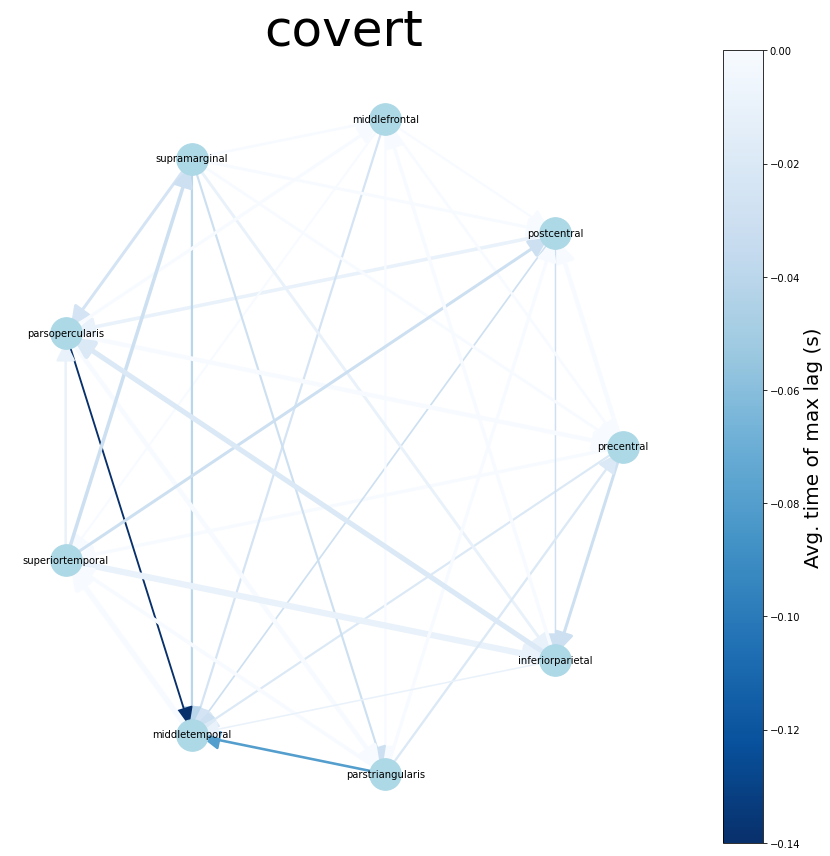

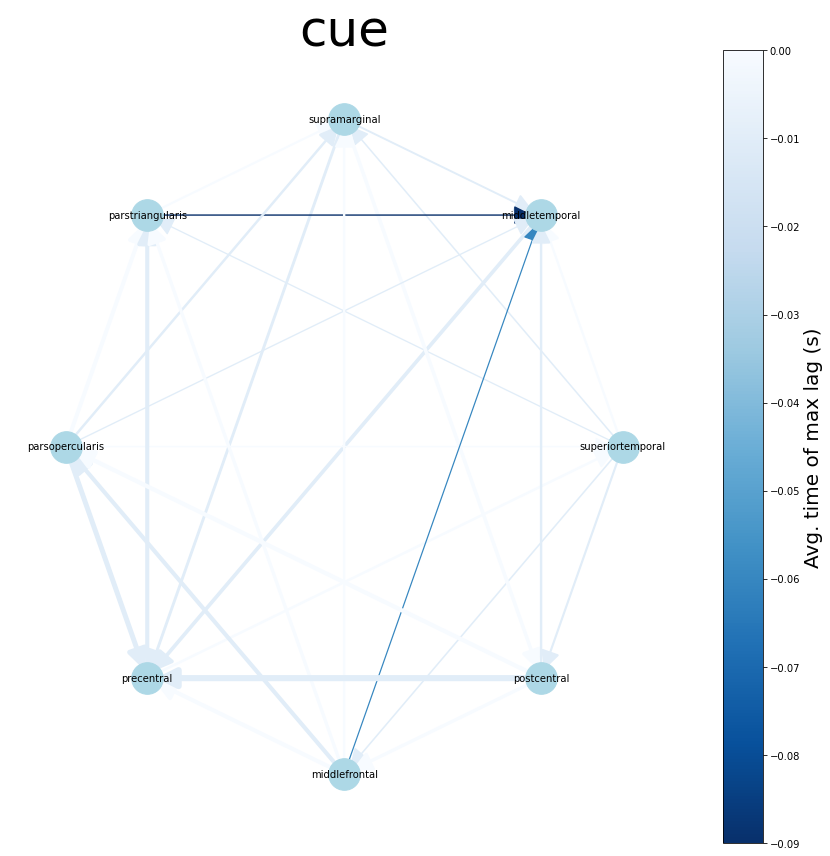

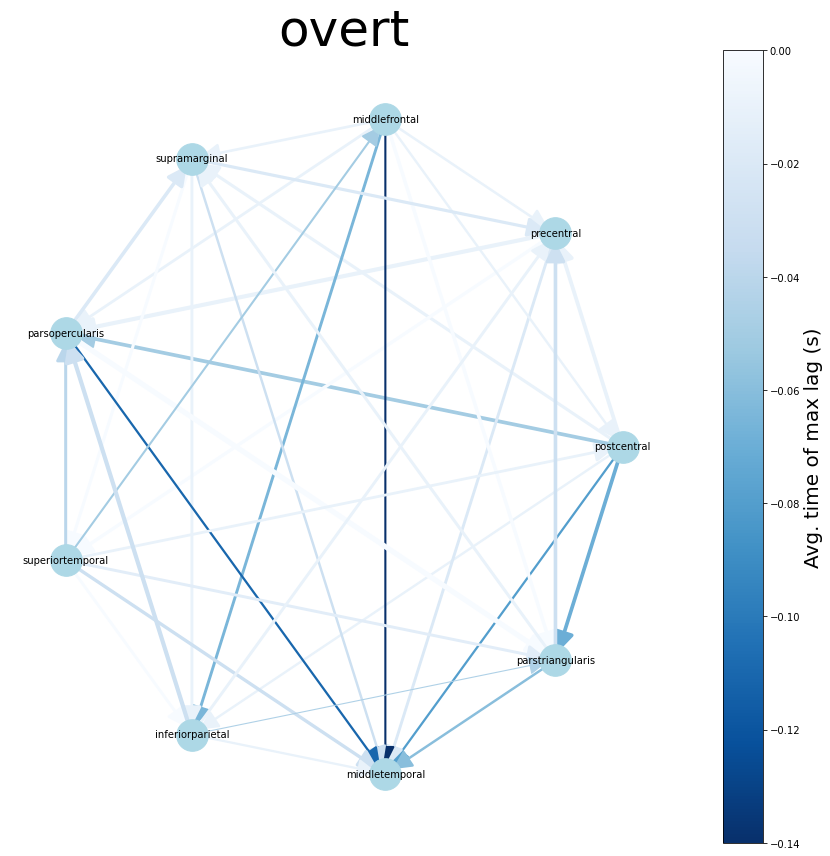

In [29]:
#plot_arrows
HS_list1 = [44, 45, 47, 48, 50,54 ,71,73,76,78]
width1 = 0.2
path = "/Users/zhaozehao/Desktop/reading task/lags"
loc_path = "/Users/zhaozehao/Desktop/reading task/"
mat_path='/Users/zhaozehao/Desktop/reading task/elecs/elec_sig'
method = 'print'

node_to_remove={'overt':remove_list,'covert':remove_list,'cue':remove_list}

arrow_plot(HS_list1, path, loc_path, mat_path, width1, method, node_to_remove)